In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
x, y = sklearn.datasets.make_moons(200, noise=0.20)

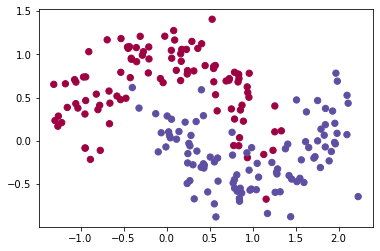

In [3]:
plt.scatter(x[:,0], x[:,1], s= 40, c = y, cmap = plt.cm.Spectral)
plt.show()

In [4]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [5]:
x.shape, y.shape

(torch.Size([200, 2]), torch.Size([200]))

In [6]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.output = nn.Linear(hidden_neurons, output_neurons)
        
    def forward(self, x):
        out = self.hidden(x)
        out = F.relu(out)
        out = self.output(out)
        return out

In [7]:
network = FeedForward(2,50,2)
optimizer = torch.optim.SGD(network.parameters(), 0.02, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

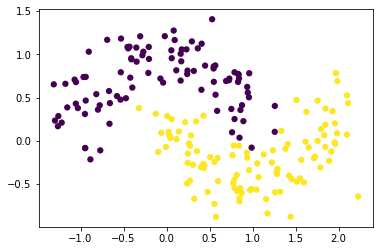

Epoch 1000/10000: Loss: 0.12251032888889313


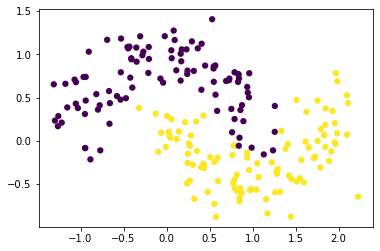

Epoch 2000/10000: Loss: 0.09586326777935028


KeyboardInterrupt: 

In [8]:
pl
epochs = 10000
for epoch in range(epochs):
    out = network(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0 and epoch > 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        plt.show()
        accuracy = (predicted_y == target_y).sum() / target_y.size
#         print(f'Epoch {epoch}/{epochs}: Loss: {loss}')
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)
        plt.show()
    